# Parameter Inference

### Import Modules

In [6]:
# extern modules
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# intern modules
from PNN_model_1d import ParameterizedNeuralNet

## 1) Load the Model

The sigmoid function saturates for very big and very small values to 1 and 0, respectively and therefore causes _Division by zero_-problems when inverting the function.
Therefore, the ParameterizedNeuralNetwork model is cut at the output layer and now displays the output of the last neuron which is the likelihood ratio.

In [7]:
# path to file
PATH: str = "../trained_models/PNN_1d.pth"

# load model from 
model = ParameterizedNeuralNet(llr_analysis=True)
PNN_state_dict = torch.load(PATH)
model.load_state_dict(PNN_state_dict)

<All keys matched successfully>

## 2) Parameter Inference

The output of the model without the sigmoid is the log likelihood ratio.

In [8]:
# size of true signal
size_true = 100 # instead of many samples one could plot lots of small parabolas and afterwards take the mean of all parabolas

# parameter mean that should be infered on
true_signal = 0.600

# list for nllr (negative log likelihood ratio)
nllr = []

# x_0 values sampled from a gaussian
x_0 = np.random.normal(loc=true_signal, scale=0.03, size=size_true)

# specific background
bg = 0.4
background = np.ones_like(x_0) * bg

# range for scanning through NN
signals = np.linspace(0,1,size_true)


# iterating through the NN
for signal_idx, signal in enumerate(signals):

    # generating background and hypothesis
    hypothesis = np.ones_like(x_0) * signal # iterate through the signals for the same x_0 -> result in a parabel of the nllr


    # creation data vector for the PNN
    data = np.empty((size_true, 3))
    data[:, 0] = x_0
    data[:, 1] = background
    data[:, 2] = hypothesis

    # pushing to tensor format
    data_tensor = torch.tensor(data).float()

    # model evaluation
    res = model(data_tensor).detach().numpy()

    # nllr appending
    lr = -2 * np.sum(res)
    nllr.append(lr)

Find inferenced parameter by minimizing the negative loglikelihood function.

In [9]:
nllr = np.array(nllr)
val, idx = min((val, idx) for (idx, val) in enumerate(nllr))
print(f"The minimum value for nnlr is: {val} which is at x = {np.round(signals[idx], 3)}. Very close to the true value: {true_signal}")

The minimum value for nnlr is: -2584.5576171875 which is at x = 0.596. Very close to the true value: 0.6


Plotting the log likelihood ratio function and the infered parameter which is the minimum.

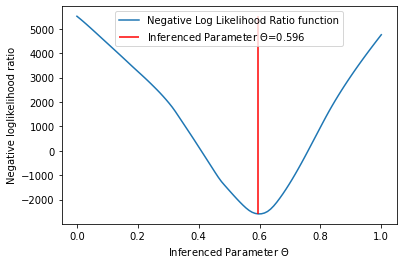

In [10]:
plt.plot(signals, nllr, label="Negative Log Likelihood Ratio function")
plt.vlines(np.round(signals[idx], 3), min(nllr), max(nllr), colors=["red"], label=f"Inferenced Parameter $\Theta$={np.round(signals[idx], 3)}")
plt.xlabel("Inferenced Parameter $\Theta$")
plt.ylabel("Negative loglikelihood ratio")
plt.legend()
plt.show()

In the frequentist approach this is done multiple times to evaluate the mean and variance.

In [11]:
# theta in the frequentist approach
theta_data = []
for _ in range(500):
    
    # copy code from above and do the same thing for lots of random distributions.

    # size of true signal
    size_true = 100 # instead of many samples one could plot lots of small parabolas and afterwards take the mean of all parabolas

    # parameter mean that should be infered on
    true_signal = 0.600

    # list for nllr (negative log likelihood ratio)
    nllr = []

    # x_0 values sampled from a gaussian
    x_0 = np.random.normal(loc=true_signal, scale=0.03, size=size_true)

    # specific background
    bg = 0.4
    background = np.ones_like(x_0) * bg

    # range for scanning through NN
    signals = np.linspace(0,1,size_true)


    # iterating through the NN
    for signal_idx, signal in enumerate(signals):

        # generating background and hypothesis
        hypothesis = np.ones_like(x_0) * signal # iterate through the signals for the same x_0 -> result in a parabel of the nllr


        # creation data vector for the PNN
        data = np.empty((size_true, 3))
        data[:, 0] = x_0
        data[:, 1] = background
        data[:, 2] = hypothesis

        # pushing to tensor format
        data_tensor = torch.tensor(data).float()

        # model evaluation
        res = model(data_tensor).detach().numpy()

        # nllr appending
        lr = -2 * np.sum(res)
        nllr.append(lr)

    # find the minimu
    val, idx = min((val, idx) for (idx, val) in enumerate(nllr))
    theta_data.append(np.round(signals[idx], 2))

Plot the distribution of the infered parameter.

(array([  5., 421.,  74.]),
 array([0.59      , 0.59666667, 0.60333333, 0.61      ]),
 <BarContainer object of 3 artists>)

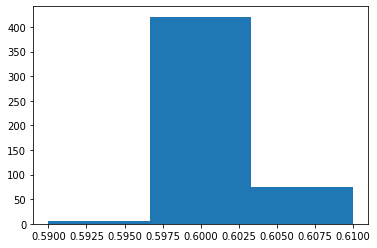

In [15]:
plt.hist(theta_data, bins=3)